In [10]:
import numpy as np
import math
import random
from random import seed
from random import random
from numpy import linalg as LA
import scipy.linalg.interpolative
import random
import matplotlib.pyplot as plt

In [11]:
def hard_thresh(x_mat,s):  # function for hard thresholding
    n=len(x_mat)
    val=[]
    
    x_mat_temp=np.array
    x_mat_temp=np.absolute(x_mat)
    ind=x_mat_temp.argsort(axis=0)
    
    val=ind[-s:]
    
    for i in range(n):
        if i not in val:
            x_mat[i]=0
        
             
    return(x_mat)

In [12]:
def plot_xn_vs_x(xn,x):
    diff=xn-x
    xminusxnorm.append(LA.norm(diff))
    return xminusxnorm   
    

In [13]:
m=500
N=2000
s=3

In [14]:
A=np.random.randn(m,N) # measurement matrix
x =np.zeros((N,1))
a=LA.norm(A,2)
A=A/(a)
xminusxnorm=[]

In [15]:
import random
randomlist = random.sample(range(0, N-1), s) # indeces for non zero values
from random import random
     
for i in randomlist:
    x[i]=random()  

y=A.dot(x)  

In [16]:
xn=np.zeros((N,1))
xn1=np.zeros((N,1)) #xn+1


def NSIHT (A,y,s,e,h,max_iter,xn,x,tol):
    iteration=0
    rel_inc=[]
    residual=[]
    rel_incr=10
    
    xminusxnorm=[]
    
    I=np.identity(N)
    xn1=np.zeros((N,1)) #xn+1
    
    while iteration<max_iter and rel_incr>tol:
        
        A_trans=A.transpose()
        inv=(A_trans.dot(A))+(e*I)
        inv=np.linalg.inv(inv) 
        
        xn1=xn+(h*inv.dot((A_trans.dot(y-A.dot(xn)))))      
        xn1=hard_thresh(xn1,s)
        
        rel_incr=LA.norm(xn1-xn)/LA.norm(xn1)
        rel_inc.append(rel_incr)
        
        residual.append(LA.norm((A.dot(xn1))-y))
        
        iteration=iteration+1
        
        xminusxnorm=plot_xn_vs_x(xn1,x)
        
        xn=xn1
           
    return xn,rel_inc,residual,iteration,xminusxnorm 

In [17]:
x_star,rel_inc,resi,iter_no,xminusxnorm=NSIHT(A,y,s,1,1,700,xn,x,1e-6)

In [18]:
for i in randomlist:  # compare values of x and xn1 after final iteration
    print(i)
    print(x_star[i])
    print(x[i])
    print("_____________")

1676
[0.90866611]
[0.90867308]
_____________
813
[0.26056923]
[0.26057101]
_____________
16
[0.31815888]
[0.31816999]
_____________


In [19]:
iter_no

154

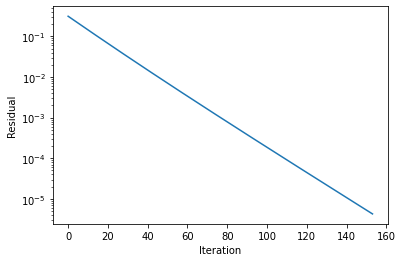

In [21]:
plt.plot(resi )  # plot of residual for each iteration
plt.xlabel("Iteration")
plt.ylabel("Residual")
plt.yscale('log')

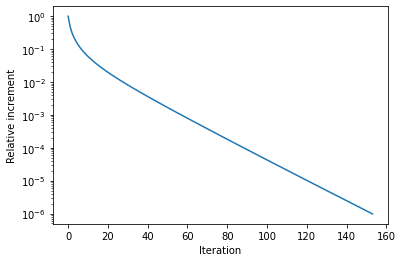

In [22]:
plt.plot(rel_inc)  # plot of relative increment for each iteration
plt.xlabel("Iteration")
plt.ylabel("Relative increment")
plt.yscale('log')

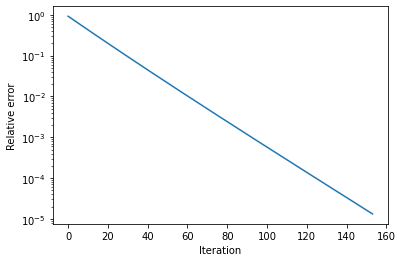

In [23]:
plt.plot(xminusxnorm)  # plot of ||xn-x||
plt.xlabel("Iteration")
plt.ylabel("Relative error")  
plt.yscale('log')